In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:

from google.colab import files


uploaded = files.upload()

Saving GOOG.csv to GOOG.csv


In [3]:
dataset_train = pd.read_csv('GOOG.csv',parse_dates=True , index_col="date")
dataset_train.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
train_size = int(len(dataset_train)*0.75)
test_size = len(dataset_train)-train_size

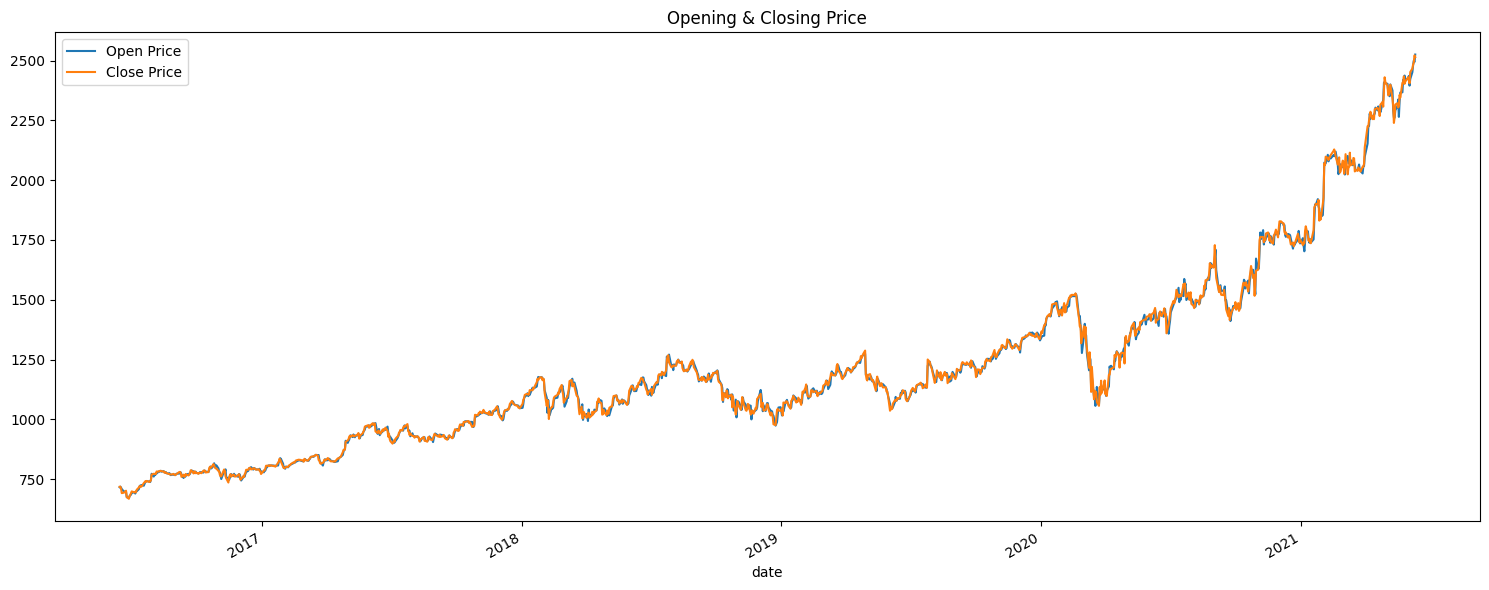

In [5]:
plt.figure(figsize=(15,6))
dataset_train['open'].plot()
dataset_train['close'].plot()
plt.title('Opening & Closing Price')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

In [6]:
dataset=dataset_train['close']
dataset = pd.DataFrame(dataset)

data=dataset.values

data.shape

(1258, 1)

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(np.array(data).reshape(-1,1))

In [9]:
train_size = int(len(data)*0.75)
test_size = len(data)-train_size

print(f'Train Size :{train_size}, Test size {test_size}')

train_data = scaled_data[:train_size,0:1]
test_data = scaled_data[train_size-60:,0:1]

Train Size :943, Test size 315


In [10]:
X_train = []
y_train = []

for i in range(60,len(train_data)):
    X_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [11]:
X_train , y_train = np.array(X_train),np.array(y_train)

In [12]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse',metrics='mean_absolute_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
callbacks = [EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)]
history = model.fit(X_train,y_train,epochs = 200,batch_size=32,callbacks=callbacks)

Epoch 1/200
28/28 [==============================] - 10s 108ms/step - loss: 0.0066 - mean_absolute_error: 0.0593
Epoch 2/200
28/28 [==============================] - 2s 80ms/step - loss: 7.6720e-04 - mean_absolute_error: 0.0214
Epoch 3/200
28/28 [==============================] - 2s 79ms/step - loss: 5.7544e-04 - mean_absolute_error: 0.0178
Epoch 4/200
28/28 [==============================] - 2s 79ms/step - loss: 6.2467e-04 - mean_absolute_error: 0.0187
Epoch 5/200
28/28 [==============================] - 2s 79ms/step - loss: 5.6172e-04 - mean_absolute_error: 0.0176
Epoch 6/200
28/28 [==============================] - 3s 120ms/step - loss: 4.9769e-04 - mean_absolute_error: 0.0166
Epoch 7/200
28/28 [==============================] - 2s 79ms/step - loss: 4.8053e-04 - mean_absolute_error: 0.0160
Epoch 8/200
28/28 [==============================] - 2s 79ms/step - loss: 4.6479e-04 - mean_absolute_error: 0.0160
Epoch 9/200
28/28 [==============================] - 2s 79ms/step - loss: 5.2067e

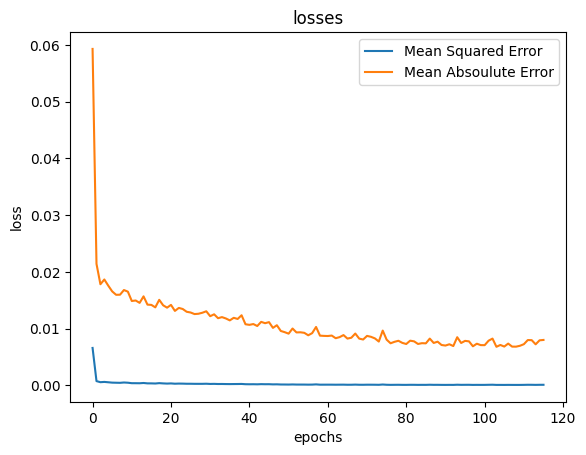

In [17]:
#Model Evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error','Mean Absoulute Error'])
plt.title('losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [18]:
x_test = []
y_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])

In [19]:
x_test= np.array(x_test)
y_test=np.array(y_test)

In [20]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [21]:
prediction = model.predict(x_test)

prediction = sc.inverse_transform(prediction)
prediction.shape

10/10 [==============================] - 1s 22ms/step


(315, 1)

In [22]:
y_test = sc.inverse_transform([y_test])

RMSE = np.sqrt(np.mean(y_test-prediction)**2)
RMSE

32.43068880208332

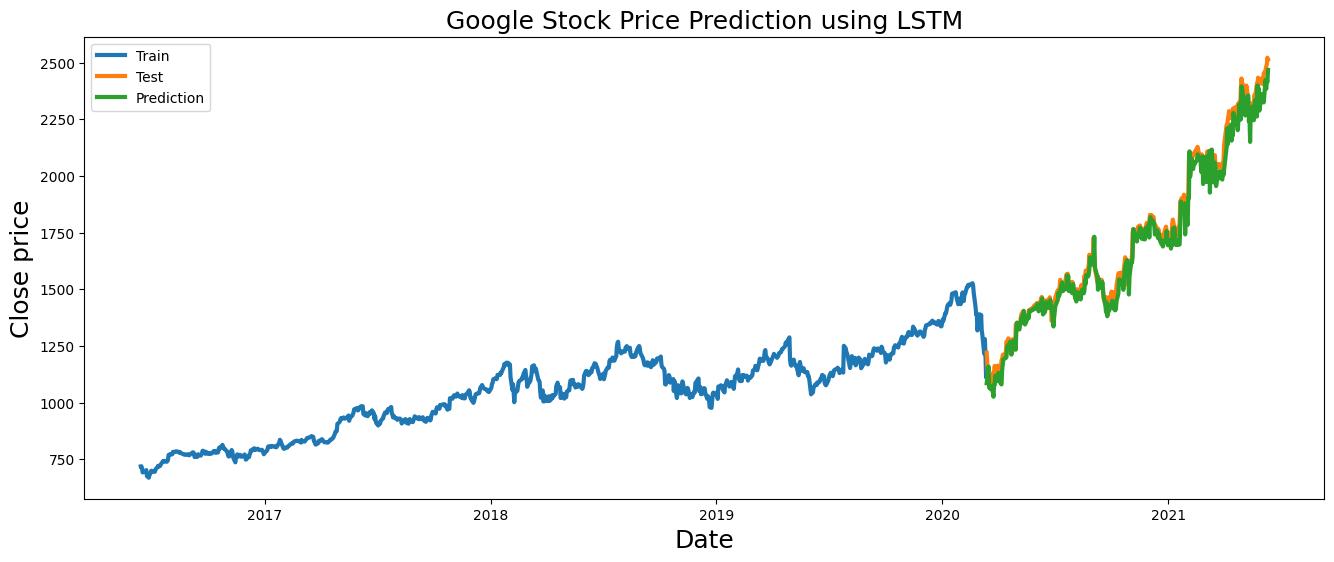

In [23]:
train = dataset.iloc[:train_size,0:1]
test = dataset.iloc[train_size:,0:1]

test['Prediction']=prediction

plt.figure(figsize=(16,6))
plt.title('Google Stock Price Prediction using LSTM',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.plot(train['close'],linewidth=3)
plt.plot(test['close'],linewidth=3)
plt.plot(test['Prediction'],linewidth=3)
plt.legend(['Train','Test','Prediction'])
plt.show()